In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm catboost shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import shap
from sklearn.linear_model import LinearRegression

print("All libraries imported successfully!")


All libraries imported successfully!


In [9]:
import os
# Define the correct directory where CSV files are stored
data_folder = "/content/drive/My Drive/ML-MP1"
files = os.listdir(data_folder)
print(files)


['starboardPitch.csv', 'portPitch.csv', 'starboardRudder.csv', 'portRudder.csv', 'trackDegreeTrue.csv', 'speedKmh.csv', 'windAngle.csv', 'level2median.csv', 'trueHeading.csv', 'level1median.csv', 'windSpeed.csv', 'speedKnots.csv', 'longitudinalWaterSpeed.csv', 'inclinometer-raw.csv', 'trackDegreeMagnetic.csv', 'fuelTemp.csv', 'fuelDensity.csv', 'fuelVolumeFlowRate.csv', 'longitude.csv', 'latitude.csv', 'ML111', 'cleaned_portRudder.csv', 'cleaned_speedKmh.csv', 'cleaned_speedKnots.csv', 'cleaned_starboardPitch.csv', 'cleaned_starboardRudder.csv', 'cleaned_trackDegreeMagnetic.csv', 'cleaned_trackDegreeTrue.csv', 'cleaned_trueHeading.csv', 'cleaned_windAngle.csv', 'cleaned_windSpeed.csv']


# Load the CSV files from Google Drive

In [10]:

# List of CSV file names from the PDF
csv_files = [
    "fuelDensity.csv",
    "fuelTemp.csv",
    "fuelVolumeFlowRate.csv",
    "inclinometer-raw.csv",
    "latitude.csv",
    "longitude.csv",
    "level1median.csv",
    "level2median.csv",
    "longitudinalWaterSpeed.csv",
    "portPitch.csv",
    "portRudder.csv",
    "speedKmh.csv",
    "speedKnots.csv",
    "starboardPitch.csv",
    "starboardRudder.csv",
    "trackDegreeMagnetic.csv",
    "trackDegreeTrue.csv",
    "trueHeading.csv",
    "windAngle.csv",
    "windSpeed.csv"
]

# Loop through each CSV file, read it, and print the first 2 rows
for file in csv_files:
    file_path = os.path.join(data_folder, file)

    # Check if the file exists to avoid errors
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        #print(f"--- {file} ---")
        print(df.head(1))  # Display first 2 rows
        num_rows = df.shape[0]
        print(f"{file}: {num_rows} rows")
        print(df.tail(1))  # Prints the last row
        print("\n")
    else:
        print(f"File not found: {file_path}")


   634019142119225390  0.9471087
0  634019142129597610    0.94711
fuelDensity.csv: 1627323 rows
         634019142119225390  0.9471087
1627322  634067079162304710   0.930101


   634019142119225390  62.20651
0  634019142129597610  62.20406
fuelTemp.csv: 1627323 rows
         634019142119225390  62.20651
1627322  634067079162304710  96.76384


   634019142119225390    0
0  634019142129597610  0.0
fuelVolumeFlowRate.csv: 1627323 rows
         634019142119225390         0
1627322  634067079162304710  0.247825


   634018095130928380  357.25
0  634018095135792430  357.26
inclinometer-raw.csv: 3559676 rows
         634018095130928380  357.25
3559675  634067079162405690  357.37


   634018095137704470  6132.9236N
0  634018095137898920  6132.9236N
latitude.csv: 2677712 rows
         634018095137704470  6132.9236N
2677711  634067079163275130  6132.9254N


   634018095137704470  00649.1143W
0  634018095137898920  00649.1143W
longitude.csv: 2677695 rows
         634018095137704470  00649.1143W
2

# Adding the main coulmn names for all CSV files and transforming the .NET epoch into Unix epoch

In [11]:

# Mapping between file names and second column names
column_mapping = {
    "fuelDensity.csv": "fuelDensity",
    "fuelTemp.csv": "fuelTemperature",
    "fuelVolumeFlowRate.csv": "fuelVolumeFlowRate",
    "inclinometer-raw.csv": "inclinometerTrimAngle",
    "latitude.csv": "latitude",
    "longitude.csv": "longitude",
    "level1median.csv": "portLevelMeasurements",
    "level2median.csv": "starboardLevelMeasurements",
    "longitudinalWaterSpeed.csv": "speedThroughWater",
    "portPitch.csv": "portPropellerPitch",
    "portRudder.csv": "portRudderAngle",
    "speedKmh.csv": "speedOverGroundKmh",
    "speedKnots.csv": "speedOverGroundKnots",
    "starboardPitch.csv": "starboardPropellerPitch",
    "starboardRudder.csv": "starboardRudderAngle",
    "trackDegreeMagnetic.csv": "trackDegreeMagnetic",
    "trackDegreeTrue.csv": "trackDegreeTrue",
    "trueHeading.csv": "trueHeading",
    "windAngle.csv": "windAngle",
    "windSpeed.csv": "windSpeed"
}

# Function to convert .NET Epoch to Unix Epoch safely
def convert_net_to_unix(timestamp):
    try:
        return (int(timestamp) - 621355968000000000) // 10**7  # Convert ticks to seconds
    except:
        return None  # Handle non-numeric values safely

# Loop through each CSV file
for file, second_col_name in column_mapping.items():
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        # Read CSV
        df = pd.read_csv(file_path, header=None)  # Read without headers to keep the first row

        # Ensure at least two columns exist
        if df.shape[1] < 2:
            print(f"Skipping {file} because it doesn't have enough columns.")
            continue

        # Convert first column (timestamp)
        df.iloc[:, 0] = df.iloc[:, 0].astype(float).apply(convert_net_to_unix)

        # Manually prepend column names instead of renaming
        new_header = pd.DataFrame([["timestamp", second_col_name]])  # Create a DataFrame with column names
        df = pd.concat([new_header, df], ignore_index=True)  # Prepend the new column names

        # Save the cleaned file
        output_path = os.path.join(data_folder, f"cleaned_{file}")
        df.to_csv(output_path, index=False, header=False)  # Save without default Pandas headers

        print(f"Converted timestamps and prepended column names in {file} → Saved as cleaned_{file}")

    else:
        print(f"File not found: {file_path}")


Converted timestamps and prepended column names in fuelDensity.csv → Saved as cleaned_fuelDensity.csv
Converted timestamps and prepended column names in fuelTemp.csv → Saved as cleaned_fuelTemp.csv
Converted timestamps and prepended column names in fuelVolumeFlowRate.csv → Saved as cleaned_fuelVolumeFlowRate.csv
Converted timestamps and prepended column names in inclinometer-raw.csv → Saved as cleaned_inclinometer-raw.csv
Converted timestamps and prepended column names in latitude.csv → Saved as cleaned_latitude.csv
Converted timestamps and prepended column names in longitude.csv → Saved as cleaned_longitude.csv
Converted timestamps and prepended column names in level1median.csv → Saved as cleaned_level1median.csv
Converted timestamps and prepended column names in level2median.csv → Saved as cleaned_level2median.csv
Converted timestamps and prepended column names in longitudinalWaterSpeed.csv → Saved as cleaned_longitudinalWaterSpeed.csv
Converted timestamps and prepended column names 

# Display the first row, last row, and number of rows for each CSV file after the 1st modification

In [12]:
# List of cleaned CSV file names
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "latitude.csv",
        "longitude.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Loop through each cleaned CSV file and display first 20 rows
for file in cleaned_csv_files:
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        #print(f"--- {file} ---")
       # print(df.head(20))  # Display first 20 rows
        #print("\n")
        print(df.head(1))  # Display first rows
        num_rows = df.shape[0]
        print(f"{file}: {num_rows} rows")
        print(df.tail(1))  # Prints the last rows
        print("\n")
    else:
        print(f"File not found: {file_path}")

    timestamp  fuelDensity
0  1266317411     0.947109
cleaned_fuelDensity.csv: 1627324 rows
          timestamp  fuelDensity
1627323  1271111116     0.930101


    timestamp  fuelTemperature
0  1266317411         62.20651
cleaned_fuelTemp.csv: 1627324 rows
          timestamp  fuelTemperature
1627323  1271111116         96.76384


    timestamp  fuelVolumeFlowRate
0  1266317411                 0.0
cleaned_fuelVolumeFlowRate.csv: 1627324 rows
          timestamp  fuelVolumeFlowRate
1627323  1271111116            0.247825


    timestamp  inclinometerTrimAngle
0  1266212713                 357.25
cleaned_inclinometer-raw.csv: 3559677 rows
          timestamp  inclinometerTrimAngle
3559676  1271111116                 357.37


    timestamp    latitude
0  1266212713  6132.9236N
cleaned_latitude.csv: 2677713 rows
          timestamp    latitude
2677712  1271111116  6132.9254N


    timestamp    longitude
0  1266212713  00649.1143W
cleaned_longitude.csv: 2677696 rows
          timestamp    l

# Print the first and last time stamp of each CSV file in a human readable form

In [13]:

import datetime

# Define the folder containing the cleaned CSV files
data_folder = "/content/drive/My Drive/ML-MP1"

# List of cleaned CSV file names
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "latitude.csv",
        "longitude.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Function to convert Unix timestamp to human-readable date
def unix_to_human(unix_timestamp):
    try:
        return datetime.datetime.utcfromtimestamp(int(unix_timestamp))
    except:
        return None  # Handle conversion errors

# Loop through each cleaned CSV file
for file in cleaned_csv_files:
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        # Read CSV (assuming "timestamp" is the first column)
        df = pd.read_csv(file_path)

        # Ensure the file is not empty
        if df.shape[0] > 0:
            first_timestamp = df.iloc[0, 0]  # First row, first column
            last_timestamp = df.iloc[-1, 0]  # Last row, first column

            # Convert timestamps to human-readable format
            first_date = unix_to_human(first_timestamp)
            last_date = unix_to_human(last_timestamp)

            # Get number of rows
            num_rows = df.shape[0]

            print(f"--- {file} ---")
            print(f"First Timestamp: {first_timestamp} → {first_date}")
            print(f"Last Timestamp: {last_timestamp} → {last_date}")
            print(f"{file}: {num_rows} rows")
            print("\n")
        else:
            print(f"Skipping {file} (empty file)\n")

    else:
        print(f"File not found: {file_path}\n")


--- cleaned_fuelDensity.csv ---
First Timestamp: 1266317411 → 2010-02-16 10:50:11
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
cleaned_fuelDensity.csv: 1627324 rows


--- cleaned_fuelTemp.csv ---
First Timestamp: 1266317411 → 2010-02-16 10:50:11
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
cleaned_fuelTemp.csv: 1627324 rows


--- cleaned_fuelVolumeFlowRate.csv ---
First Timestamp: 1266317411 → 2010-02-16 10:50:11
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
cleaned_fuelVolumeFlowRate.csv: 1627324 rows


--- cleaned_inclinometer-raw.csv ---
First Timestamp: 1266212713 → 2010-02-15 05:45:13
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
cleaned_inclinometer-raw.csv: 3559677 rows


--- cleaned_latitude.csv ---
First Timestamp: 1266212713 → 2010-02-15 05:45:13
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
cleaned_latitude.csv: 2677713 rows


--- cleaned_longitude.csv ---
First Timestamp: 1266212713 → 2010-02-15 05:45:13
Last Timestamp: 1271111116 → 2010-04-12 22:25:16
clea

# Plotting the timeline of all data features

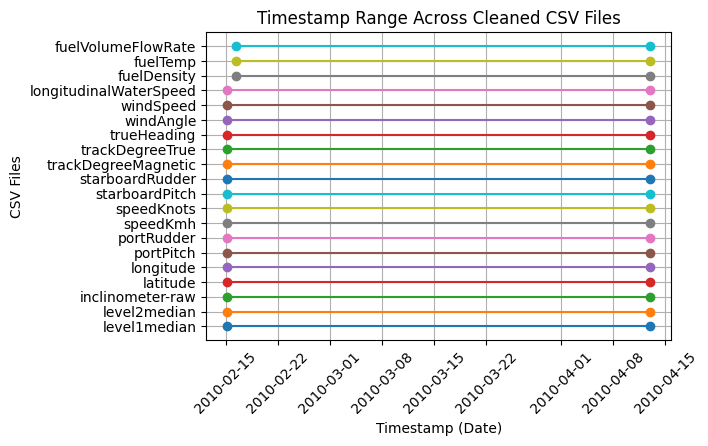

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

# Define the folder containing the cleaned CSV files
data_folder = "/content/drive/My Drive/ML-MP1"

# List of cleaned CSV file names
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "latitude.csv",
        "longitude.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Function to convert Unix timestamp to human-readable format
def unix_to_human(unix_timestamp):
    try:
        return datetime.datetime.utcfromtimestamp(int(unix_timestamp))
    except:
        return None  # Handle errors safely

# Store min/max timestamps for visualization
time_ranges = []

# Extract timestamp range for each file
for file in cleaned_csv_files:
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path, dtype={'timestamp': 'int64'})

        if "timestamp" in df.columns and df.shape[0] > 0:
            min_time = df["timestamp"].min()
            max_time = df["timestamp"].max()

            # Convert timestamps to human-readable format
            min_date = unix_to_human(min_time)
            max_date = unix_to_human(max_time)

            time_ranges.append((file.replace("cleaned_", "").replace(".csv", ""), min_date, max_date))

# Sort by start time for better visualization
time_ranges.sort(key=lambda x: x[1])

# Create a plot
plt.figure(figsize=(6, 4))

# Plot each file's timestamp range as a horizontal bar
for i, (file, start, end) in enumerate(time_ranges):
    plt.plot([start, end], [i, i], marker="o", linestyle="-", markersize=6, label=file)

plt.xlabel("Timestamp (Date)")
plt.ylabel("CSV Files")
plt.title("Timestamp Range Across Cleaned CSV Files")
plt.yticks(range(len(time_ranges)), [file for file, _, _ in time_ranges])
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


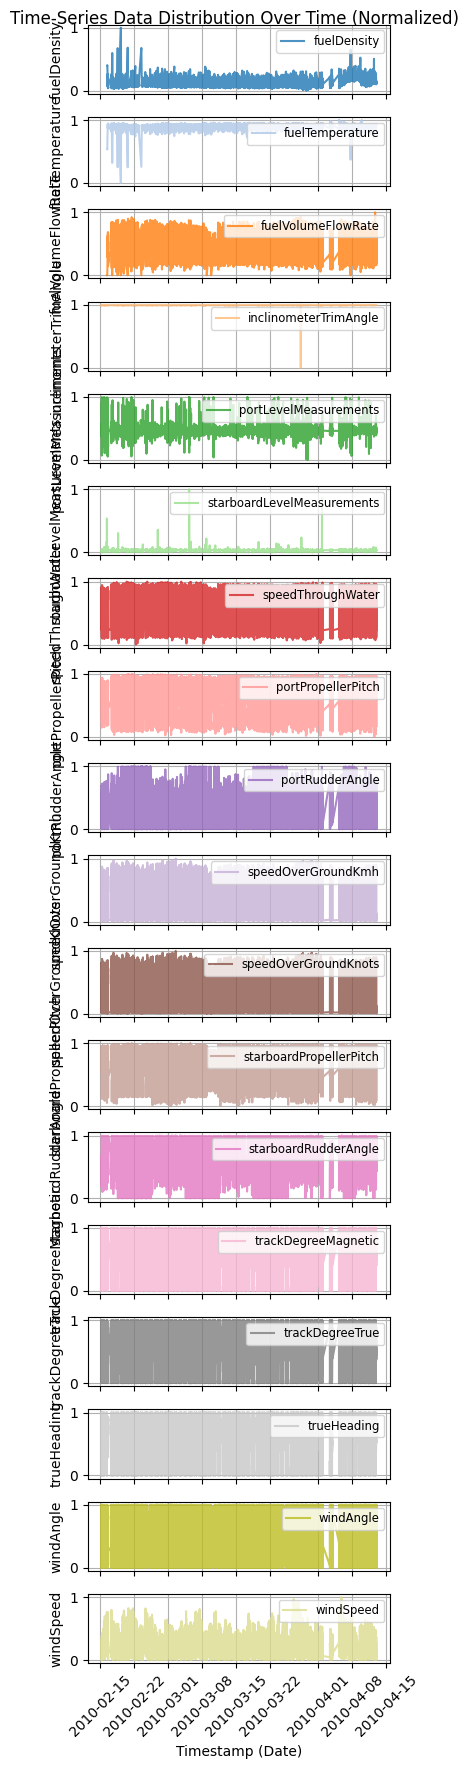

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the folder containing the cleaned CSV files
data_folder = "/content/drive/My Drive/ML-MP1"

# List of cleaned CSV files (EXCLUDING latitude & longitude)
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Set up subplots (one for each sensor)
num_sensors = len(cleaned_csv_files)
fig, axes = plt.subplots(num_sensors, 1, figsize=(4, 1 * num_sensors), sharex=True)

# Ensure axes is iterable even if there's only one subplot
if num_sensors == 1:
    axes = [axes]

# Generate unique colors for each file
colors = plt.colormaps.get_cmap("tab20")  # Get colormap
color_list = [colors(i % 20) for i in range(len(cleaned_csv_files))]  # Assign colors

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Loop through each cleaned CSV file and plot data
for idx, (file, ax) in enumerate(zip(cleaned_csv_files, axes)):
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path, dtype={'timestamp': 'int64'})

        if "timestamp" in df.columns and df.shape[0] > 0:
            # Convert timestamps to datetime
            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

            # Extract the second column (sensor values)
            value_col = df.columns[1]  # Second column contains actual data
            values = df[value_col]

            # Convert to numeric, force errors to NaN
            values = pd.to_numeric(values, errors="coerce")

            # Drop NaN values (if any)
            df = df.dropna(subset=[value_col])
            values = values.dropna()

            # Ensure timestamps and values have the same number of elements
            if len(df["timestamp"]) == 0 or len(values) == 0:
                print(f"Skipping {file} (No valid numeric data after cleaning)")
                continue

            # Normalize values (0-1 scale)
            if len(values) > 1:  # Ensure there are enough points to scale
                values = scaler.fit_transform(values.values.reshape(-1, 1)).flatten()

            # Plot each sensor’s data in its own subplot
            ax.plot(df["timestamp"], values, label=value_col, color=color_list[idx], alpha=0.8)
            ax.set_ylabel(value_col)
            ax.legend(loc="upper right", fontsize="small")
            ax.grid(True)

# Format the figure
plt.xlabel("Timestamp (Date)")
plt.suptitle("Time-Series Data Distribution Over Time (Normalized)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Merged all modified CSV files horizontally using "timestamp"using inner Join to keep only timestamps that appear in only somefiles.
# I merge in chunks (Memory Efficient) to avoid exhausting RAM.

In [ ]:
import pandas as pd
import os

# Define the folder containing the cleaned CSV files
data_folder = "/content/drive/My Drive/ML-MP1"
output_file = os.path.join(data_folder, "merged_data_inner_streaming.csv")

# List of cleaned CSV file names
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "latitude.csv",
        "longitude.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Start with the first file as the base dataset
first_file = os.path.join(data_folder, cleaned_csv_files[0])
merged_df = pd.read_csv(first_file, dtype={'timestamp': 'int64'}).set_index("timestamp")

print(f"Loaded initial file: {cleaned_csv_files[0]} (Rows: {merged_df.shape[0]})")

# Process files in chunks to save memory
for file in cleaned_csv_files[1:]:
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        print(f"Processing {file}...")

        # Read new file in chunks
        chunk_iter = pd.read_csv(file_path, dtype={'timestamp': 'int64'}, chunksize=50000)  # Adjust chunk size if needed

        for chunk in chunk_iter:
            chunk.set_index("timestamp", inplace=True)
            merged_df = merged_df.join(chunk, how="inner")  # Only keep matching timestamps

            # Write intermediate results to disk (avoid RAM overload)
            merged_df.to_csv(output_file, index=True, mode="w")

        print(f"✔ Merged: {file} (Rows remaining: {merged_df.shape[0]})")

    else:
        print(f"File not found: {file_path}")

# Final save
merged_df.reset_index(inplace=True)
merged_df.to_csv(output_file, index=False)

print(f"\n✅ Merging completed! Data saved as {output_file}")


Loaded initial file: cleaned_fuelDensity.csv (Rows: 1627324)
Processing cleaned_fuelTemp.csv...


ValueError: columns overlap but no suffix specified: Index(['fuelTemperature'], dtype='object')

# Merge using merge_asof

In [16]:
import pandas as pd
import os

# Define the folder containing the cleaned CSV files
data_folder = "/content/drive/My Drive/ML-MP1"
output_file = os.path.join(data_folder, "merged_data_asof_10s.csv")

# List of cleaned CSV file names
cleaned_csv_files = [
    f"cleaned_{file}" for file in [
        "fuelDensity.csv",
        "fuelTemp.csv",
        "fuelVolumeFlowRate.csv",
        "inclinometer-raw.csv",
        "latitude.csv",
        "longitude.csv",
        "level1median.csv",
        "level2median.csv",
        "longitudinalWaterSpeed.csv",
        "portPitch.csv",
        "portRudder.csv",
        "speedKmh.csv",
        "speedKnots.csv",
        "starboardPitch.csv",
        "starboardRudder.csv",
        "trackDegreeMagnetic.csv",
        "trackDegreeTrue.csv",
        "trueHeading.csv",
        "windAngle.csv",
        "windSpeed.csv"
    ]
]

# Load the first file as the base dataset
first_file = os.path.join(data_folder, cleaned_csv_files[0])
base_df = pd.read_csv(first_file, dtype={'timestamp': 'int64'})

print(f"Loaded initial file: {cleaned_csv_files[0]} (Rows: {base_df.shape[0]})")

# Ensure timestamps are correctly formatted as integers
base_df["timestamp"] = base_df["timestamp"].astype("int64")

# Convert timestamps from seconds to pandas datetime
base_df["timestamp"] = pd.to_datetime(base_df["timestamp"], unit="s")

# Explicitly sort timestamps (merge_asof requires sorted timestamps)
base_df = base_df.sort_values("timestamp")

# Process each file using merge_asof()
for file in cleaned_csv_files[1:]:
    file_path = os.path.join(data_folder, file)

    if os.path.exists(file_path):
        print(f"Processing {file}...")

        # Read entire file into memory
        df = pd.read_csv(file_path, dtype={'timestamp': 'int64'})

        # Ensure timestamps are correctly formatted as integers
        df["timestamp"] = df["timestamp"].astype("int64")

        # Convert timestamps from seconds to pandas datetime
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

        # Ensure timestamps are sorted
        df = df.sort_values("timestamp")

        # Merge using `merge_asof()` with a 10-second tolerance
        base_df = pd.merge_asof(base_df, df, on="timestamp", tolerance=pd.Timedelta("1s"), direction="backward")

        print(f"✔ Merged: {file} (Rows remaining: {base_df.shape[0]})")

    else:
        print(f"File not found: {file_path}")

# Save the final merged dataset
base_df.to_csv(output_file, index=False)
print(f"\n✅ Merging completed! Data saved as {output_file}")


Loaded initial file: cleaned_fuelDensity.csv (Rows: 1627324)
Processing cleaned_fuelTemp.csv...
✔ Merged: cleaned_fuelTemp.csv (Rows remaining: 1627324)
Processing cleaned_fuelVolumeFlowRate.csv...
✔ Merged: cleaned_fuelVolumeFlowRate.csv (Rows remaining: 1627324)
Processing cleaned_inclinometer-raw.csv...
✔ Merged: cleaned_inclinometer-raw.csv (Rows remaining: 1627324)
Processing cleaned_latitude.csv...
✔ Merged: cleaned_latitude.csv (Rows remaining: 1627324)
Processing cleaned_longitude.csv...
✔ Merged: cleaned_longitude.csv (Rows remaining: 1627324)
Processing cleaned_level1median.csv...
✔ Merged: cleaned_level1median.csv (Rows remaining: 1627324)
Processing cleaned_level2median.csv...
✔ Merged: cleaned_level2median.csv (Rows remaining: 1627324)
Processing cleaned_longitudinalWaterSpeed.csv...
✔ Merged: cleaned_longitudinalWaterSpeed.csv (Rows remaining: 1627324)
Processing cleaned_portPitch.csv...
✔ Merged: cleaned_portPitch.csv (Rows remaining: 1627324)
Processing cleaned_portRudd

In [17]:
df_merged = pd.read_csv("/content/drive/My Drive/ML-MP1/merged_data_asof_10s.csv")
print(df_merged.head())


             timestamp  fuelDensity  fuelTemperature  fuelVolumeFlowRate  \
0  2010-02-16 10:50:11     0.947109         62.20651            0.000000   
1  2010-02-16 10:50:12     0.947110         62.20406            0.000000   
2  2010-02-16 10:50:13     0.947114         62.19989            0.000000   
3  2010-02-16 10:50:15     0.947104         62.20412            0.000000   
4  2010-02-16 12:48:13     0.938305         86.89216            0.283816   

   inclinometerTrimAngle    latitude    longitude  portLevelMeasurements  \
0                    NaN         NaN          NaN                    NaN   
1                    NaN         NaN          NaN                    NaN   
2                    NaN  6200.4337N  00645.9278W                    NaN   
3                    NaN  6200.4337N  00645.9277W              15.062303   
4                 357.23         NaN          NaN              16.703257   

   starboardLevelMeasurements  speedThroughWater  ...  portRudderAngle  \
0           

In [18]:
print(f"\n✅ Final merged DataFrame has {base_df.shape[0]} rows.")
# Count the number of rows with at least one NaN value
rows_with_nan = base_df.isna().any(axis=1).sum()

print(f"🔍 Number of rows with at least one NaN value: {rows_with_nan}")



✅ Final merged DataFrame has 1627324 rows.
🔍 Number of rows with at least one NaN value: 647478


# Drop rows with NaN values

In [19]:
import pandas as pd

# Load the merged dataset
file_path = "/content/drive/My Drive/ML-MP1/merged_data_asof_10s.csv"
df = pd.read_csv(file_path)

# Remove rows where any column has NaN
df_cleaned = df.dropna()

# Save the cleaned dataset
cleaned_file_path = "/content/drive/My Drive/ML-MP1/merged_data_asof_10s_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

# Print row count before and after cleaning
print(f"Original dataset: {df.shape[0]} rows")
print(f"Cleaned dataset (NaN removed): {df_cleaned.shape[0]} rows")

print(f"\n✅ Cleaned dataset saved as {cleaned_file_path}")


Original dataset: 1627324 rows
Cleaned dataset (NaN removed): 979846 rows

✅ Cleaned dataset saved as /content/drive/My Drive/ML-MP1/merged_data_asof_10s_cleaned.csv


# calculating and adding Energy Consumption

In [20]:
import pandas as pd
import os

# Define paths
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_asof_10s_cleaned.csv")
output_file = os.path.join(data_folder, "merged_data_with_energy.csv")

# Load the merged dataset
df = pd.read_csv(merged_file)

# Check if required columns exist
if "fuelDensity" not in df.columns or "fuelVolumeFlowRate" not in df.columns:
    raise ValueError("Missing required columns: fuelDensity and fuelVolumeFlowRate")

# Calculate energy consumption (tons/day)
df["energy_consumption"] = (df["fuelDensity"] * df["fuelVolumeFlowRate"] * 3600 * 24) / 1000

# Save the updated dataset
df.to_csv(output_file, index=False)

print(f"\n✅ Energy consumption calculated and saved as {output_file}")



✅ Energy consumption calculated and saved as /content/drive/My Drive/ML-MP1/merged_data_with_energy.csv


In [21]:
import pandas as pd

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_with_energy.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Print the first 10 rows
print(df.head(10))


             timestamp  fuelDensity  fuelTemperature  fuelVolumeFlowRate  \
0  2010-02-16 12:48:15     0.938036         87.22346            0.282821   
1  2010-02-16 12:48:17     0.937767         87.53302            0.279850   
2  2010-02-16 12:48:18     0.937604         87.72702            0.271989   
3  2010-02-16 12:48:20     0.937124         88.15513            0.281508   
4  2010-02-16 12:48:21     0.936797         88.40273            0.294495   
5  2010-02-16 12:48:23     0.936353         88.78259            0.326485   
6  2010-02-16 12:48:24     0.936129         88.95963            0.335701   
7  2010-02-16 12:48:26     0.935864         89.21343            0.341670   
8  2010-02-16 12:48:27     0.935846         89.28416            0.356499   
9  2010-02-16 12:48:29     0.935805         89.49892            0.397933   

   inclinometerTrimAngle    latitude    longitude  portLevelMeasurements  \
0                 357.23  6200.4301N  00645.9397W              16.850815   
1          

# Latitude and Longitude converted to Decimal Values

In [22]:
import pandas as pd
import re

# Function to convert Latitude & Longitude to Decimal Degrees
def convert_to_decimal(coord):
    match = re.match(r"(\d+)(\d{2}\.\d+)([NSEW])", coord)
    if not match:
        return None  # Return None if format is incorrect

    degrees, minutes, direction = match.groups()
    decimal_value = float(degrees) + float(minutes) / 60  # Convert to Decimal Degrees

    # Handle direction
    if direction in ["S", "W"]:
        decimal_value *= -1  # Make it negative for South/West

    return decimal_value

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_with_energy.csv")
output_file = os.path.join(data_folder, "merged_data_converted.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Convert Latitude & Longitude columns
df["latitude"] = df["latitude"].apply(convert_to_decimal)
df["longitude"] = df["longitude"].apply(convert_to_decimal)

# Save the updated dataset
df.to_csv(output_file, index=False)

print(f"\n✅ Latitude and Longitude converted successfully! Data saved as {output_file}")



✅ Latitude and Longitude converted successfully! Data saved as /content/drive/My Drive/ML-MP1/merged_data_converted.csv


In [23]:
merged_file = os.path.join(data_folder, "merged_data_converted.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Print the first 10 rows
print(df.head(10))

             timestamp  fuelDensity  fuelTemperature  fuelVolumeFlowRate  \
0  2010-02-16 12:48:15     0.938036         87.22346            0.282821   
1  2010-02-16 12:48:17     0.937767         87.53302            0.279850   
2  2010-02-16 12:48:18     0.937604         87.72702            0.271989   
3  2010-02-16 12:48:20     0.937124         88.15513            0.281508   
4  2010-02-16 12:48:21     0.936797         88.40273            0.294495   
5  2010-02-16 12:48:23     0.936353         88.78259            0.326485   
6  2010-02-16 12:48:24     0.936129         88.95963            0.335701   
7  2010-02-16 12:48:26     0.935864         89.21343            0.341670   
8  2010-02-16 12:48:27     0.935846         89.28416            0.356499   
9  2010-02-16 12:48:29     0.935805         89.49892            0.397933   

   inclinometerTrimAngle   latitude  longitude  portLevelMeasurements  \
0                 357.23  62.007168  -6.765662              16.850815   
1                

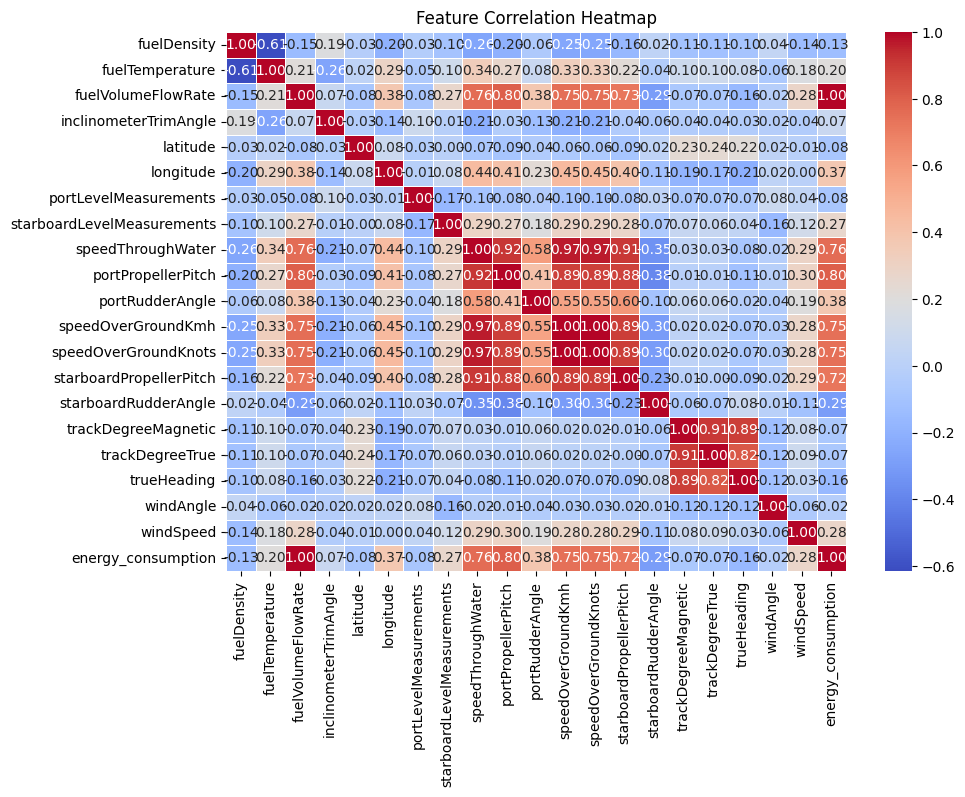

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_converted.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Drop non-numeric columns (timestamp)
if "timestamp" in df.columns:
    df = df.drop(columns=["timestamp"])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap with values inside squares
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,  # Show values inside squares
    fmt=".2f",   # Format numbers to 2 decimal places
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()


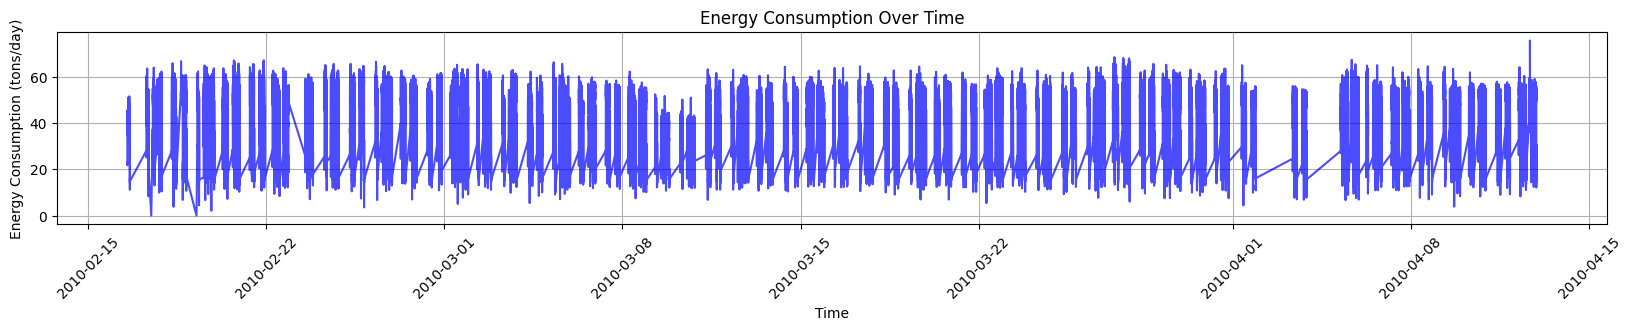

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_converted.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Check if 'timestamp' is already in datetime format
if not pd.api.types.is_datetime64_any_dtype(df["timestamp"]):
    df["timestamp"] = pd.to_datetime(df["timestamp"])  # No unit="s" since it's already datetime

# Plot energy consumption over time
plt.figure(figsize=(20, 2.5))
plt.plot(df["timestamp"], df["energy_consumption"], color="b", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Energy Consumption (tons/day)")
plt.title("Energy Consumption Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()


# Names of columns in my merged csv containing the EC

In [26]:
import pandas as pd

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_converted.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Print all column names
print("Column Names in merged_data_converted.csv:")
print(df.columns.tolist())


Column Names in merged_data_converted.csv:
['timestamp', 'fuelDensity', 'fuelTemperature', 'fuelVolumeFlowRate', 'inclinometerTrimAngle', 'latitude', 'longitude', 'portLevelMeasurements', 'starboardLevelMeasurements', 'speedThroughWater', 'portPropellerPitch', 'portRudderAngle', 'speedOverGroundKmh', 'speedOverGroundKnots', 'starboardPropellerPitch', 'starboardRudderAngle', 'trackDegreeMagnetic', 'trackDegreeTrue', 'trueHeading', 'windAngle', 'windSpeed', 'energy_consumption']


# Aggregating data for 1 min time interval (calculating sums and means)

In [33]:
import pandas as pd
import os

# Define file paths
data_folder = "/content/drive/My Drive/ML-MP1"
merged_file = os.path.join(data_folder, "merged_data_converted.csv")
output_file = os.path.join(data_folder, "merged_data_aggregated.csv")

# Load the dataset
df = pd.read_csv(merged_file)

# Convert timestamp to datetime for proper time grouping
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Define the aggregation method for each column
agg_methods = {
    "fuelDensity": "mean",
    "fuelTemperature": "mean",
    "fuelVolumeFlowRate": "sum",
    "energy_consumption": "sum",
    "inclinometerTrimAngle": "mean",
    "latitude": "mean",
    "longitude": "mean",
    "portLevelMeasurements": "mean",
    "starboardLevelMeasurements": "mean",
    "speedThroughWater": "mean",
    "portPropellerPitch": "mean",
    "portRudderAngle": "mean",
    "speedOverGroundKmh": "mean",
    "speedOverGroundKnots": "mean",
    "starboardPropellerPitch": "mean",
    "starboardRudderAngle": "mean",
    "trackDegreeMagnetic": "mean",
    "trackDegreeTrue": "mean",
    "trueHeading": "mean",
    "windAngle": "mean",
    "windSpeed": "mean"
}

# Choose a time interval (e.g., '1min', '10min', '1H' for hourly, 'D' for daily)
time_interval = "1min"

# Group by time interval
df_aggregated = df.resample(time_interval, on="timestamp").agg(agg_methods).reset_index()

# ✅ Remove rows with ANY NaN values
df_aggregated.dropna(how="any", inplace=True)

# Save the cleaned aggregated dataset
df_aggregated.to_csv(output_file, index=False)

print(f"\n✅ Data aggregated by {time_interval} and saved as {output_file}")
print(f"Total rows after cleaning: {df_aggregated.shape[0]}")



✅ Data aggregated by 1min and saved as /content/drive/My Drive/ML-MP1/merged_data_aggregated.csv
Total rows after cleaning: 27901


In [35]:
#df_aggregated = pd.read_csv("/content/drive/My Drive/ML-MP1/merged_data_aggregated.csv")
#print(df_aggregated.head())
#print("Number of rows in df_aggregated:", df_aggregated.shape[0])

import pandas as pd

# Load the dataset
df_aggregated = pd.read_csv("/content/drive/My Drive/ML-MP1/merged_data_aggregated.csv")

# Print the first 10 rows
print("First 10 rows:")
print(df_aggregated.head(10))

# Print the last 10 rows
print("\nLast 10 rows:")
print(df_aggregated.tail(10))

# Print the total number of rows
print("\nNumber of rows in df_aggregated:", df_aggregated.shape[0])


First 10 rows:
             timestamp  fuelDensity  fuelTemperature  fuelVolumeFlowRate  \
0  2010-02-16 12:48:00     0.934483        89.950044            9.036963   
1  2010-02-16 12:49:00     0.931651        92.423621           16.848049   
2  2010-02-16 12:50:00     0.932174        92.455396           13.893837   
3  2010-02-16 12:51:00     0.936179        89.153074           17.677181   
4  2010-02-16 12:52:00     0.932724        90.342561           17.679381   
5  2010-02-16 12:53:00     0.932079        92.237312           17.556492   
6  2010-02-16 12:54:00     0.931838        92.767978           17.290019   
7  2010-02-16 12:55:00     0.930571        93.681623           17.833572   
8  2010-02-16 12:56:00     0.930516        94.038403           16.994271   
9  2010-02-16 12:57:00     0.929201        95.194659           18.889018   

   energy_consumption  inclinometerTrimAngle   latitude  longitude  \
0          729.569285             357.324286  62.007066  -6.765859   
1       

# Correlation of Features in the final dataset to be considered

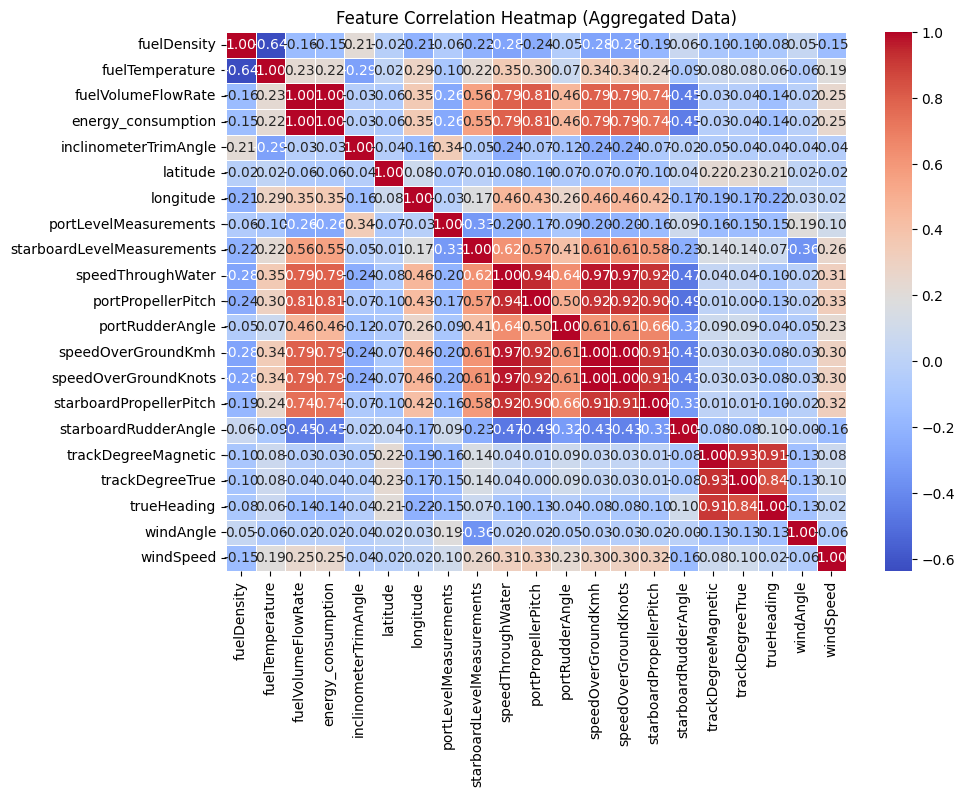

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
aggregated_file = os.path.join(data_folder, "merged_data_aggregated.csv")

# Load the dataset
df = pd.read_csv(aggregated_file)

# Drop non-numeric columns (timestamp)
if "timestamp" in df.columns:
    df = df.drop(columns=["timestamp"])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap with values inside squares
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,  # Show values inside squares
    fmt=".2f",   # Format numbers to 2 decimal places
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap (Aggregated Data)")
plt.show()


In [43]:
import pandas as pd

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
aggregated_file = os.path.join(data_folder, "merged_data_aggregated.csv")

# Load the dataset
df_aggregated = pd.read_csv(aggregated_file)

# Drop non-numeric columns (e.g., timestamp)
df_numeric = df_aggregated.select_dtypes(include=["number"])  # Keep only numeric columns

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Get correlation of features with 'energy_consumption'
energy_corr = corr_matrix["energy_consumption"]

# Filter features with correlation > 0.5 or < -0.5
high_corr_features = energy_corr[abs(energy_corr) > 0.1].sort_values(ascending=False)

# Print the results
print("Features with High Correlation to Energy Consumption (>|0.5|):")
print(high_corr_features)


Features with High Correlation to Energy Consumption (>|0.5|):
energy_consumption            1.000000
fuelVolumeFlowRate            0.999937
portPropellerPitch            0.809671
speedThroughWater             0.793425
speedOverGroundKmh            0.789808
speedOverGroundKnots          0.789803
starboardPropellerPitch       0.737507
starboardLevelMeasurements    0.554102
portRudderAngle               0.457019
longitude                     0.348494
windSpeed                     0.247350
fuelTemperature               0.223500
trueHeading                  -0.144480
fuelDensity                  -0.147909
portLevelMeasurements        -0.256916
starboardRudderAngle         -0.446497
Name: energy_consumption, dtype: float64


# ML Model 1: Random Forest

✅ Model Performance:
Mean Absolute Error (MAE): 77.5241
Root Mean Squared Error (RMSE): 123.9780
R² Score: 0.8984


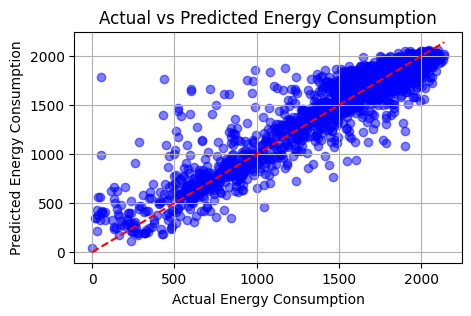

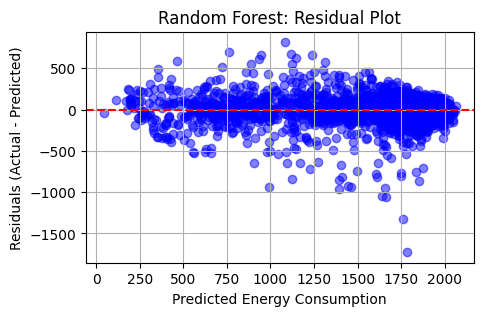

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
aggregated_file = os.path.join(data_folder, "merged_data_aggregated.csv")

# Load the dataset
df = pd.read_csv(aggregated_file)

# Drop non-numeric columns (like timestamp)
df_numeric = df.select_dtypes(include=["number"])

# Define the target variable (y) and selected features (X)
target = "energy_consumption"
features = [
    "speedThroughWater",
    "portRudderAngle",
    "starboardLevelMeasurements",
    "longitude",
    "starboardRudderAngle",
    "windSpeed",
    "fuelTemperature",
    "portLevelMeasurements",
    "fuelDensity",
    "starboardPropellerPitch",
]

# Select features and target variable
X = df_numeric[features]
y = df_numeric[target]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print(f"✅ Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted energy consumption
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")  # Zero-error line
plt.xlabel("Predicted Energy Consumption")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest: Residual Plot")
plt.grid(True)
plt.show()

# XGBoost Model

✅ XGBoost Model Performance:
Mean Absolute Error (MAE): 74.6942
Root Mean Squared Error (RMSE): 121.5589
R² Score: 0.9033


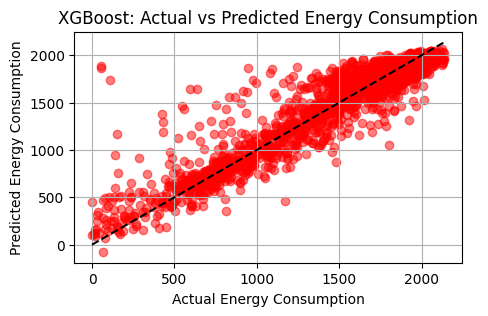

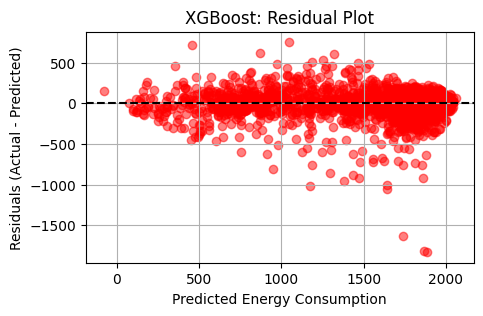

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define file path
data_folder = "/content/drive/My Drive/ML-MP1"
aggregated_file = os.path.join(data_folder, "merged_data_aggregated.csv")

# Load the dataset
df = pd.read_csv(aggregated_file)

# Drop non-numeric columns (like timestamp)
df_numeric = df.select_dtypes(include=["number"])

# Define the target variable (y) and selected features (X)
target = "energy_consumption"
features = [
    "speedThroughWater",
    "speedOverGroundKnots",
    "speedOverGroundKmh",
    "portPropellerPitch",
    "starboardPropellerPitch",
    "portRudderAngle",
    "starboardLevelMeasurements",
    "longitude",
    "starboardRudderAngle",
    "windSpeed",
    "fuelTemperature"
]

# Select features and target variable
X = df_numeric[features]
y = df_numeric[target]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print(f"✅ XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted energy consumption
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Diagonal line
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("XGBoost: Actual vs Predicted Energy Consumption")
plt.grid(True)
plt.show()

# 📌 Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, alpha=0.5, color="red")
plt.axhline(y=0, color="black", linestyle="--")  # Zero-error line
plt.xlabel("Predicted Energy Consumption")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("XGBoost: Residual Plot")
plt.grid(True)
plt.show()